# Visualizing Gradient Descent

👨‍💻 **Arjun Adhikari**, June 12, 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os

In [2]:
os.chdir(r"C:\users\arjun\Desktop\workspace\machine-learning\linear-regression")
print(os.getcwd())

C:\Users\arjun\Desktop\workspace\machine-learning\linear-regression


In [3]:
def read_data(path):
    df = pd.read_csv(path)
    return df.values

In [4]:
x = read_data('./csv/linearX.csv')
y = read_data('./csv/linearY.csv')

X = (x - x.mean())/x.std()
Y = y

print(X.shape)
print(Y.shape)

(99, 1)
(99, 1)


In [5]:
T0 = np.arange(-2,3,0.01)
T1 = np.arange(-2,3,0.01)

T0, T1 = np.meshgrid(T0, T1)

### Loss

In [6]:
J = np.zeros(T0.shape)

In [7]:
m = T0.shape[0]
n = T1.shape[0]

In [8]:
for i in range(m):
    for j in range(n):
        J[i,j] = np.sum((Y - T1[i,j]*X - T0[i,j])**2) # Hypothesis was here        
print(J.shape)

(500, 500)


### Plot the 3D Loss

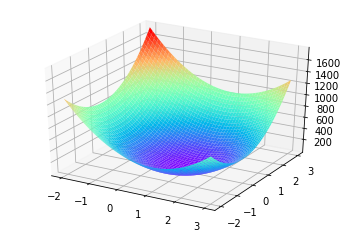

In [9]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.plot_surface(T0,T1,J, cmap='rainbow')
plt.show()

### Contour

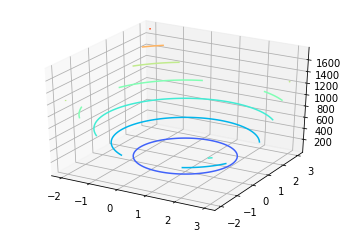

In [10]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.contour(T0,T1,J, cmap='rainbow')
plt.show()

#### Settings the X Limit and Y Limit

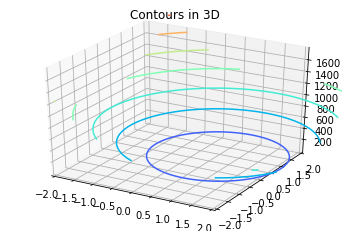

In [11]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.set_xlim([-2,2])
axes.set_ylim([-2,2])

axes.contour(T0,T1,J, cmap='rainbow')
plt.title("Contours in 3D")
plt.show()

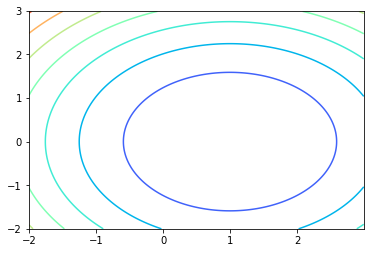

In [12]:
plt.contour(T0, T1, J, cmap='rainbow')
plt.show()

### Plot the Trajectory

At the convergence, the trajectory should be incident.

In [13]:
def hypothesis(X,theta):
    
    return theta[0] + theta[1]*X

In [14]:
def error(X,Y, theta):
    
    error=0
    m=X.shape[0]
    
    for i in range(m):
        hx = hypothesis(X[i], theta)
        error += (hx - Y[i])**2
        
    return error

In [15]:
def gradient(X,Y, theta):
    
    m = X.shape[0]
    grad = np.array([0.0, 0.0])
    
    for i in range(m):
        
        hx = hypothesis(X[i], theta)
        
        grad[0] += (hx - Y[i])
        grad[1] += ((hx - Y[i])*X[i])  
        
    return grad

In [16]:
def gradientDescent(X,Y, theta, learning_rate=0.001):
    
    grad = np.array([0.0, 0.0])
    
    itr=0
    max_itr=100
    
    error_list=[]
    theta_list=[]
    
    while(itr <= max_itr):
        
        grad = gradient(X,Y, theta)
        err = error(X,Y, theta)
        
        error_list.append(err)
        theta_list.append((theta[0], theta[1]))
        
        theta[0] = theta[0] - (learning_rate*grad[0])
        theta[1] = theta[1] -  (learning_rate*grad[1])
        
        itr += 1
        
    return theta, error_list, theta_list

In [17]:
theta = np.array([0.0, 0.0])

final_theta, error_list, theta_list = gradientDescent(X,Y, theta)
print(final_theta)

[0.99660749 0.0013579 ]


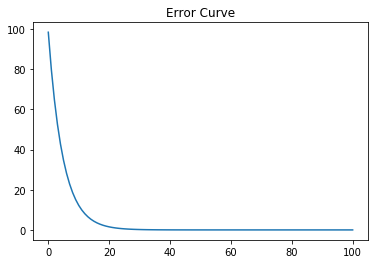

In [18]:
plt.plot(error_list)
plt.title("Error Curve")
plt.show()

In [19]:
theta_list = np.array(theta_list)

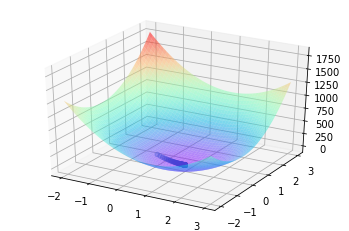

In [20]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.scatter(theta_list[:,0], theta_list[:,1], error_list, cmap='k')
axes.plot_surface(T0, T1, J, cmap='rainbow', alpha=0.5)
plt.show()

At the below, on periphery of the convergence, we see a scattered diagram approaching the convergence.  

Let's visualize with another value of $\theta$.

In [21]:
theta = np.array([-5.0, 0.0])

final_theta, error_list, theta_list = gradientDescent(X,Y, theta)
print(final_theta)

[0.99647378 0.0013579 ]


In [22]:
theta_list = np.array(theta_list)

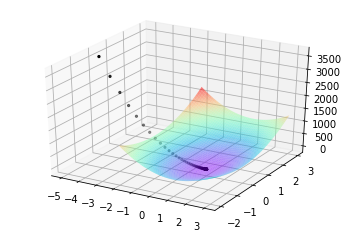

In [23]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.plot_surface(T0, T1, J, cmap='rainbow', alpha=0.5)
axes.scatter(theta_list[:,0], theta_list[:,1], error_list, marker='.', c='k')
plt.show()

#### 3D Contour

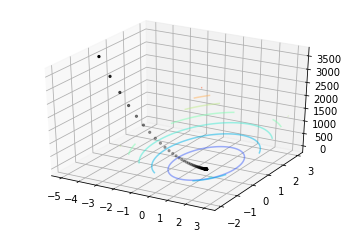

In [24]:
fig = plt.figure()
axes = fig.gca(projection='3d')

axes.contour(T0, T1, J, cmap='rainbow', alpha=0.5)
axes.scatter(theta_list[:,0], theta_list[:,1], error_list, marker='.', c='k')
plt.show()

The gradient is taking a big step at first.  
As we go down the curve and coming close to the local minima, the gradient is almost constant.  
And our algorithm is converged.

#### 2D Contour

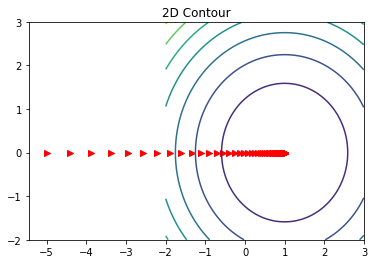

In [25]:
plt.contour(T0,T1, J)
plt.scatter(theta_list[:,0], theta_list[:,1], c='red', marker='>', label="Trajectory")
plt.title("2D Contour")
plt.show()